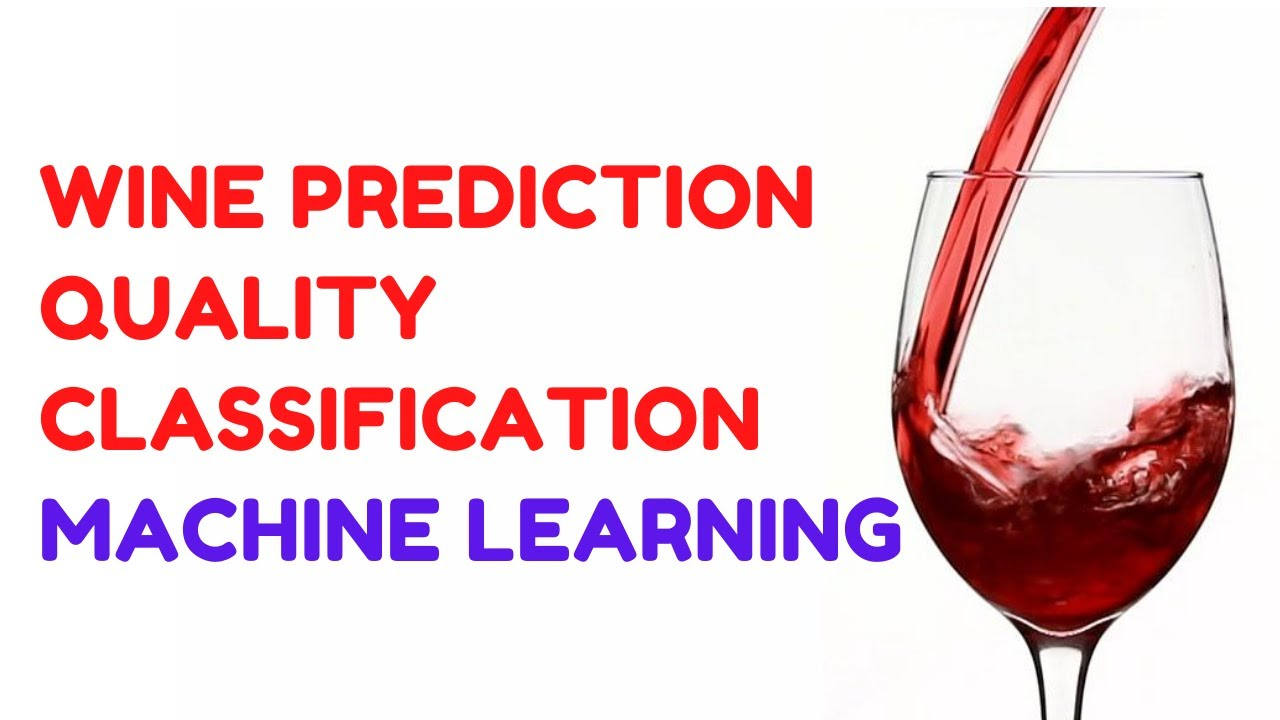

In [5]:
from IPython import display
display.Image("wine qality.jpg")

# Importing Libraries

In [32]:
# IMPORT NECESSARY LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
# Load the dataset
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

# Description

In [5]:
# Check the summary statistics of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Check the data types of each column
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
# Check for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Data analysis using visualisation

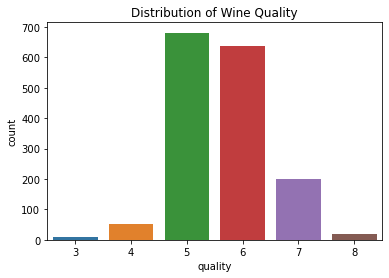

In [33]:
# Check the distribution of the target variable
import seaborn as sns
sns.countplot(df['quality'])
plt.title('Distribution of Wine Quality')
plt.show()

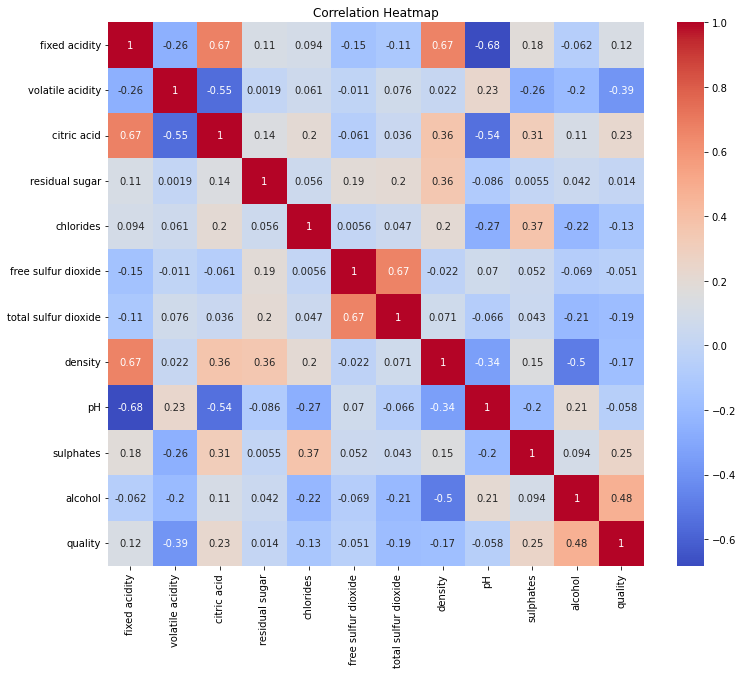

In [12]:
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

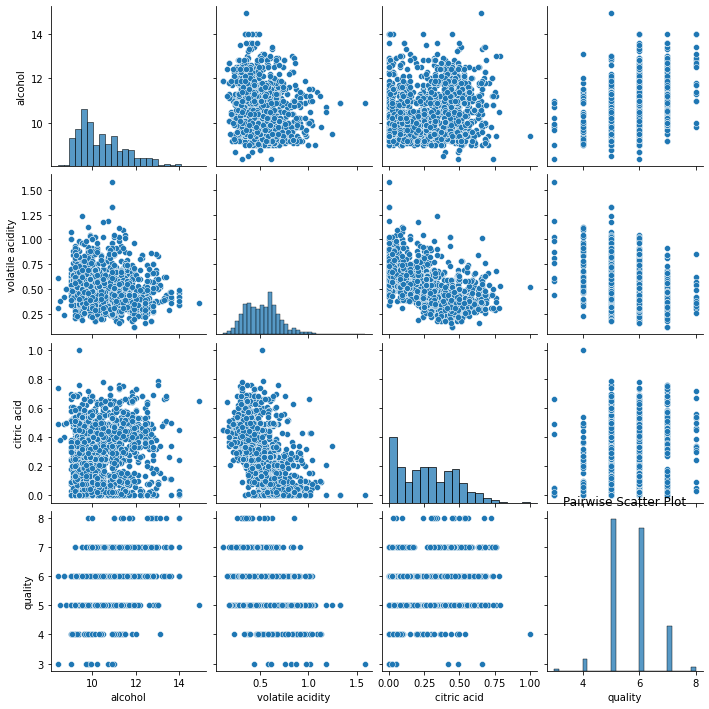

In [13]:
# Pairwise scatter plot for some variables
sns.pairplot(df[['alcohol', 'volatile acidity', 'citric acid', 'quality']])
plt.title('Pairwise Scatter Plot')
plt.show()

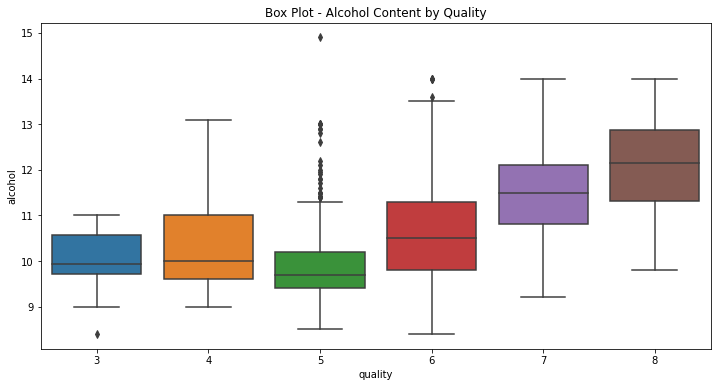

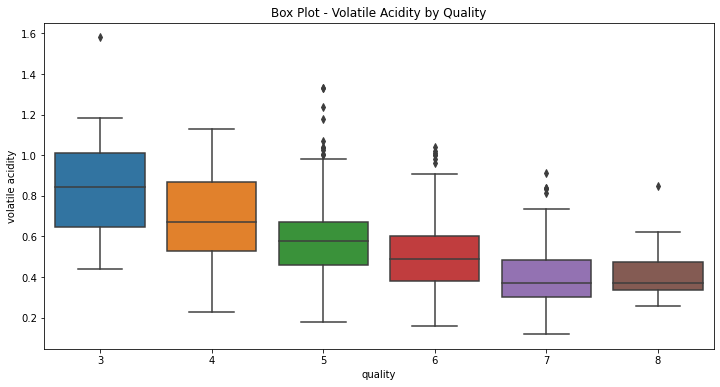

In [14]:
# Box plots for each quality category
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Box Plot - Alcohol Content by Quality')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Box Plot - Volatile Acidity by Quality')
plt.show()

# Separate data into dependent and target variable

In [5]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

Added new column named 'goodquality' in which class '1' represents good quality wine having rating >=7, '0' represents bad quality wine. This will create binary classification problem.

In [6]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

# Splitting dataset

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Data conversion

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Model Creation

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_scaled,y_train)
Y_pred = logistic.predict(X_test_scaled)

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print("Accuracy Score:",accuracy_score(y_test,Y_pred))

Accuracy Score: 0.896875


In [16]:
confusion_mat = confusion_matrix(y_test,Y_pred)
print(confusion_mat)

[[273   8]
 [ 25  14]]


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy',random_state=7)
DT.fit(X_train_scaled,y_train)
y_pred = DT.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.903125


# K nearest neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_scaled,y_train)
y_pred = KNN.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8875


# Random Forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.93125

# XGBoost

In [20]:
import xgboost as xgb
XGB = xgb.XGBClassifier(random_state=1)
XGB.fit(X_train_scaled, y_train)
y_pred5 = XGB.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred5))

Accuracy Score: 0.915625


# Evaluation

In [46]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree' ,'KNN','Random Forest','Xgboost'],
    'Score': [0.896,0.903,0.887,0.931,0.915]
    })

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
Random Forest,0.931
Xgboost,0.915
Decision Tree,0.903
Logistic Regression,0.896
KNN,0.887


Conclusion: Random forest gives best performance so I will use that for further evaluation.

In [41]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
phat = rf.predict_proba(X_test_scaled)[:,1]
print('precision on the test set: ', precision_score(y_test, y_pred))
print('accuracy on the test set: ', accuracy_score(y_test, y_pred))

precision on the test set:  0.75
accuracy on the test set:  0.921875


# ROC curve

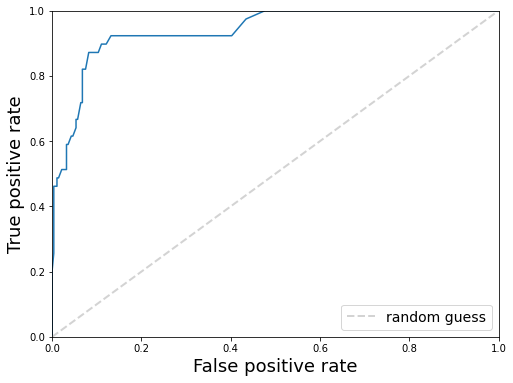

In [42]:
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, phat)
plt.plot(fpr, tpr)
x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [43]:
print('AUC is: ', auc(fpr,tpr))

AUC is:  0.9391824071539374


# Thank you !!!